$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

## Tehtävä 1: Z-portin toteus kvanttitietokoneesa

### Johdanto
Kierroksella 2 kubittien tilat $\ket +$ ja $\ket -$ määritettiin seuraavasti:
$$
 \ket + = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1), \\
 \ket - = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1). 
$$

Z-portin (ns. phase-flip gate) matriisiesitys on seuraava:

$$
Z=  \pmatrix {1 & 0 \\ 0 & -1}
$$

Z-portin vaikutus esimerkiksi tiloihin $\ket +$ ja $\ket -$ on seuraava:

$$
\begin{align}
Z\ket + &= \ket - \text{ja}\\
Z\ket - &= \ket +
\end{align}
$$

### Tehtävä
Professori Mikko Möttöinen kertoi luennolla, ettei kvanttitietokoneen valmistajan tarvitse realisoida kaikkia kvanttitietokoneen portteja, koska useiden porttien toiminta on korvattavissa muilla porteilla. Miten Z-portin operaatio on toteutettavissa Hadamard H-portilla ja X-portilla eli not portilla? 

Ohje: Tutki kuinka Z-portti kiertää Blochin pallolle piirrettyä tilavektoria, tai päättele miten Z-portin matriisiesitys saadaan laskettua H- ja X-porttien matriisiesityksestä. Kertauksena:





$$
X=  \pmatrix {0 & 1 \\ 1 & 0} \quad \text{ja} \quad H=\frac 1 {\sqrt{2}}\pmatrix {1 & 1 \\ 1 & -1}
$$





## Tehtävä 2:  Piirin tilavektorin tarkastelua

### Johdanto
Seuraavassa esimerkissä luodaan yhden kubitin kvanttipiiri, ja tulostetaan piirin tilavektori ja sen esitys Blochin pallolla. Koodin tulosteessa merkintä `1+0j` tarkoittaa, että kompleksiluvun reaaliosa on 1 ja `j` on imaginääriyksikkö.


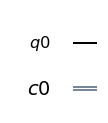

In [1]:
from qiskit import *

qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.draw(output='mpl')

(1+0j) |0>
0j |1>


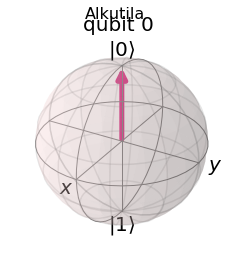

In [2]:
simulator = Aer.get_backend('statevector_simulator')

# Suoritetaan
result = execute(circuit, simulator).result()
statevector = result.get_statevector(circuit)

# Tulostetaan saatu tila ket-notaation kera
for i, c in enumerate(statevector):
    print(c, f"|{i:0b}>")

visualization.plot_bloch_multivector(statevector, title="Alkutila")

### a) tehtävä
Ohjelmoi yllä olevan esimerkin mukaisesti yhden kubitin kvanttipiiri, jossa kubitin alkutila on alussa §\ket 1$, jonka jälkeen kubittiin operoidaan H-portilla. Simuloi piiri, ja tulosta tämän jälkeen tilavektori käyttäen komentoa `result.get_statevector(circuit)` ja piirrä yhden kubitin systeemin tilavektori Blochin pallolla.

Sinun tulisi saada lopputulosteeksi seuraava:

<img src="https://kvanttilaskenta.net/hub/static/content/kierros5/bloch_k1.png" width="400">

Huomaa, tulosteessa, että kompleksiluvun kerroin $1 / \sqrt 2 \approx 0.707$ ja että imagarinääriosa $10^{-17} \approx 0$. Numeerisesta virheestä johtuen tuloksen imaginääriosa ei ole täsmälleen nolla, mutta äärimmäisen lähellä nollaa. Kuvan tila on siis saavutettu operoimalla tilaan $\ket 1$ portilla H:

$$
H\ket 1 = \frac 1 {\sqrt{2}}(\ket 0 - \ket 1) \quad \text{eli} \quad H\ket 1 = \ket -
$$

Blochin pallo sopii havainnollistamisvälineeksi yhden kubitin systemeissä. Tehtävän b-osassa tarkastellaan useamman kubitin systeemiä, joten systeemin tila esitetään jatkossa ket-vektoreilla.

In [ ]:
#kirjoita vastauksesi tähän

### b)-tehtävä
Jatka a-osaa ja tutki simuloimalla, että $H \ket - = \ket 1$. Esitä ratkaisuna lopputuloksen tilavektori ja sen esitys Blochin pallolla.

In [ ]:
# Ohjelmoi ratkaisusi tähän

### c)-osan johdanto kahden kubitin systeemin tila
Tarkastellaan johdantona seuraavaa kahden kubitin kvanttipiriä. 

<img src="https://kvanttilaskenta.net/hub/static/content/kierros5/bloch_k2.png" width="400">

Systeemin tila H-portin jälkeen:
$$
\frac{1}{\sqrt 2} (\ket 0 +  \ket 1) \otimes \ket 0=\frac{1}{\sqrt 2}(\ket{00}+\ket{10})
$$

Systeemin tila CNOT-portin jälkeen:
$$
\frac{1}{\sqrt 2}(\ket{00}+\ket{11})
$$
Systeemin tila X-portin jälkeen:
$$
\frac{1}{\sqrt 2}(\ket{10}+\ket{01})
$$
Alla piirin rakentamisessa käytetty koodi:

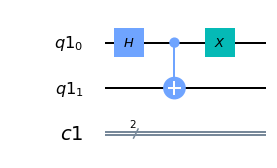

In [3]:
from qiskit import *

qreg = QuantumRegister(2)
creg = ClassicalRegister(2)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.cx(qreg[0],qreg[1])
circuit.x(qreg[0])
circuit.draw(output='mpl')

Simuloidaan piirin toiminta ja tulostetaan tilavektori:

In [4]:
simulator = Aer.get_backend('statevector_simulator')

# Suoritetaan
result = execute(circuit, simulator).result()
statevector = result.get_statevector(circuit)
# Tulostetaan saatu tila ket-notaation kera
for i, c in enumerate(statevector):
    print(c, f"|{i:02b}>")


0j |00>
(0.7071067811865476+0j) |01>
(0.7071067811865475+0j) |10>
0j |11>


### b) tehtävä
Simuloi kuvan piirin toiminta ja tulosta tilavektori:
<img src="https://kvanttilaskenta.net/hub/static/content/kierros5/bloch_k3.png" width="400">

Perustele piirin toiminta laskemalle ket-esitystä käyttäen.

In [ ]:
#kirjoita vastauksesi tähän

### Johdanto tehtävään tehtävään 3

Yhden kubitin systeemissä tilavektoria voidaan kiertää Blochin pallolla käyttämällä T- ja S-portteja. Kierrot tapahtuvat Z-akselin suhteen.

Kun tilavektoria kierretään $\frac \pi 4$ radiaania (45 astetta) z-akselin suhteen, käytetään T-porttia seuraavasti (Esimerkikki koodi T-portin käytöstä ja koodin tuloste):

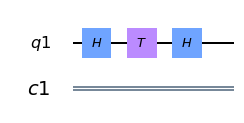

In [2]:
# Suorita esimerkin koodi
from qiskit import *
import math

qreg = QuantumRegister(1)
creg = ClassicalRegister(1)
circuit = QuantumCircuit(qreg, creg)
circuit.h(qreg[0])
circuit.t(qreg[0]) # T-portti
circuit.h(qreg[0])
circuit.draw(output='mpl')

Tulostetaan tilavektorin ket-esitys ja Blochin pallo:

(0.8535533905932737+0.3535533905932736j) |0>
(0.1464466094067262-0.3535533905932737j) |1>


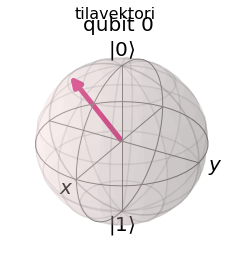

In [3]:
simulator = Aer.get_backend('statevector_simulator')

# Suoritetaan
result = execute(circuit, simulator).result()
statevector = result.get_statevector(circuit)

# Tulostetaan saatu tila ket-notaation kera
for i, c in enumerate(statevector):
    print(c, f"|{i:01b}>")

visualization.plot_bloch_multivector(statevector, title="tilavektori")

Tuloksista nähdään, että lopputilan vektori on $0.85\ket 0 + 0.15\ket 1$

### Tehtävät

Mitkä ovat lopputilan kertoimet, jos tilavektoria kierretään z-akselin suhteen seuraavasti:

a) $\pi/2$ radiaania S-portilla käyttäen komentoa `circuit.s(qreg[0])` koodissa:
<img src="https://kvanttilaskenta.net/hub/static/content/kierros5/rotation_hsh.png" width="300">


b) S ja T-portilla käyttäen komentoja `circuit.s(greg[0])` ja `circuit.t(greg[0])`koodissa:
<img src="https://kvanttilaskenta.net/hub/static/content/kierros5/rotation_hsth.png" width="300">


## Tehtävä 2: Satunnaisluvun arpominen ja kvanttinoppa

Tässä tehtävässä tutkitaan, miten kvanttitietokonetta voisi käyttää satunnaislukujen tuottamiseen.


#### Muistutus binäärijärjestelmästä

Esimerkiksi 10-järjestelmän luku 6 voidaan esittää binäärimuodossa $6=1\cdot 2^2+1\cdot2^1+0\cdot 2^0=110_2$.



Seuraava kvanttipiiri käyttä 5 kubittia, joilla arvotaan 5 klassisesta bitistä koostuva satunnaisluku:


<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/quantum_dice1.png" width="300">



a) Selitä piirin toimintaperiaate. Miten kuvan kvanttipiirin avulla voidaan määrittää 5 bitistä koostuva satunnaisluku binäärimuodossa?

b) Ohjelmoi kuvan kvanttipiiri. Jos osaat, kokeile myös simuloida piirin toimintaa.

c) **Kvanttinoppa:**

Aiemmalla esimerkillä saadaan vain noppia, joilla on jonkin kahden potenssin ($2^n$) verran eri silmälukuja. Seuraavassa yritämme luoda perinteisen 6-sivuisen nopan.

Alla oleva piiri esittää kvanttinoppaa, joka arpoo yhden kuudesta luvusta: 0, 1, 3, 4, 5 tai 7. 

<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/quantum_dice2.jpeg" width="300">

Tavoitteena on, että jokaisella loputuloksella olisi sama todennäköisyys. Ennen mittausta piirin luomaa kolmen kubitin tilaa voidaan esittää tilavektorilla

$$
\ket \psi =\frac1{\sqrt6}(\ket {000}+\ket{001}+\ket{011}+\ket{100}+\ket{101}+\ket{111}).
$$

Kolmen kubitin systeemi on superpositiossa, ja kun systeemin tila mitataan, on jokaisella mahdollisella lopputilalla sama esiintymistodennäköisyys,

$$P=\left(\frac 1 {\sqrt 6}\right)^2=\frac 1 6$$. 

Kun tila mitataan, tallettuu tieto saadusta lopputuloksesta klassiseen rekisteriin. Esimerkiksi binääriluku $011_2= 0\cdot2^2+1\cdot2^1+1\cdot2^0=3_{10}$ on 10-järjestelmän luku 3. 

Piirissä on kaksi uutta porttia, ohjattu (controlled) Hadamard ja kubitin tilan kierto y-akselin suhteen Blochin pallolla. Kiertoportilla $R_y$ luodaan tila $\frac 1 { \sqrt{3}} (\ket 0 + \sqrt 2 \ket 1) $ ja ohjatulla Hadamard-portilla jaetaan lausekkeen jälkimmäinen termi kahteen osaan, jolloin saadaan $\frac 1{\sqrt3}(\ket {00}+\ket{01}+\ket{11})$. Kiertoportin parametri eli kääntökulma valitaan siten, että lopputulos painottuu oikein.  Hadamard-muunnos tehdään siis vain niille tilan osille, joissa ensimmäinen kubitti on $\ket 1$. (muista järjestys: ensimmäinen kubitti bittijonossa viimeisenä)



Seuraavassa piirin simuloinnista saadut tulokset:

<img src="https://kvanttilaskenta.net/hub/static/content/kierros4/dice_sim.jpeg" width="300">




Alla on kvanttipiirin määrittelyssä käytetty koodi. Simuloi piiri. Suorita tämän jälkeen koodi oikella kvanttitietokoneella ja vertaile simuloinnin ja todellisten suoritusten eroja. Miten käytetyt portit vaikuttavat piirin toimintaan?

_Taustatietoa:_ Yhden kubitin kääntöportit (tässä parametrisoitu $R_y$ ja Hadamard) toteutetaan suprajohtavien kubittien kvanttitietokoneessa eri mittaisilla mikroaaltopulsseilla. Pulssin pituus määrää kääntökulman. Voiko tämä kääntö olla tarkkaa?

Monimutkaisia usean kubitin portteja, kuten ohjattua Hadamard-porttia ei ole yleensä suoraan toteutettu kvanttitietokoneessa, vaan sen toiminta pitää korvata useammalla alkeellisella portilla.


In [ ]:
from qiskit import *
import math

qreg = QuantumRegister(3)
creg = ClassicalRegister(3)

circuit = QuantumCircuit(qreg,creg)
circuit.draw(output='mpl')

In [ ]:
# Ry-portti ottaa parametrina haluamamme kulman
circuit.ry(2*math.acos(1/math.sqrt(3)), qreg[0])
circuit.ch(qreg[0], qreg[1])
circuit.h(qreg[2])
circuit.barrier()
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
circuit.measure(qreg[2],creg[2])
circuit.draw(output='mpl')

In [ ]:
# Tehtävä 2 jatkuu: simulointi
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()

# Vaihtoehtoisesti kokeile kommentoitua koodia,
# joka kertoo jokaisen nopanheiton tuloksen erikseen:
#execute(circuit, backend=simulator)
#result = execute(circuit, backend=simulator, shots=16, memory=True).result().get_memory()
#print(result)

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [ ]:
# Yksi toisto, poista tarvittessa kommentit
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
counts = result.get_counts()
print(counts)

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')

# Vaihda tähän haluamasi IBM:n kvanttitietokoneen nimi
# (lista löytyy esim. IBM:n nettisivuilta)
qcomp = provider.get_backend('ibmq_essex')
job = execute(circuit, backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job) # Koodi jää odottamaan tähän, kun lähetys on jonossa ja käsiteltävänä

result = job.result()
plot_histogram(result.get_counts(circuit))

Tekstivastauskenttä. (tuplaklikkaa, niin pääset muokkaamaan)



## Tehtävä 3

Tehtävässä 3 rakennetaan tutoriaalin avulla kvanttipiiri, joka ratkaisee binaarimuotoisen salasanan yhdellä yrityksellä. Salasana koostuu vain 0:sta ja 1:stä, salasanan pituus voi vaihdella. Annettuna on funktio eli musta laatikko, joka käyttäytyy sovitulla tavalla salasanan perusteella. Funktio käyttäytyy siten, että se vertailee salasanan jokaista bittiä ja syötteen jokaista bittiä. Funktio laskee AND-operaation salasanan $s$ ja syötteen $x$ jokaisen bitin välillä.   

$$
\begin{array}{r|cccccc}
s & 0 & 1 & 1 & 0 & 1 & 0 \\
x & 0 & 0 & 1 & 1 & 1 & 0 \\ 
\hline
\mathit{AND}  &0&0&1&0&1&0
\end{array}
$$

Funktio palauttaa 0 jos tuloksena oli parillinen määrä ykkösbittejä, muuten funktio palauttaa 1. Toisin sanoen, funktio kertoo, kuinka monta kertaa salasanassa ja syötteessä on 1 bitti samassa kohdassa ja palauttaa tiedon onko näitä kohtia pariton vai parillinen määrä. Taulukon esimerkissä funktio palauttaisi arvon 0.

Tässä termi "musta laatikko" ei tarkoita, ettemme tietäisi piirin toteutusta, päinvastoin: piirin jokainen portti on oltava tiedossa, jotta se voidaan suorittaa kvanttitietokonella. Tämä herättää kysymyksen, mitä hyötyä salasanan ratkaisemisesta on. Bernsteinin-Vaziranin algoritmi ei olekaan käytännössä kovin hyödyllinen, koska se rajaa mustan laatikon, eli funktion toiminnan todella tarkasti. Monimutkaisemmissa algoritmeissa funktio voidaan kuitenkin helposti määrittää tavalla, jolla emme pysty helposti ennustamaan sen käyttäytymistä, esimerkiksi matemaattisten laskutoimitusten avulla.

### Klassinen tausta: 
Jos salasana koostuu 6 bitistä, kuten esimerkkiksi 101001, niin klassisella tietkoneella tarvitaan salasanan selvittämiseen 6 kappaletta funktion kutsuja. Jos salasanan bittien määrä $n$ kasvaa, niin klassinen tietokone tarvitsee salasanan selvittämiseen $n$ kappaletta funktion kutsuja. Salasana saadaan selville testaamalla jokaista bittiä erikseen:

$$
f(100000)=1 \\
f(010000)=0 \\
f(001000)=1 \\
f(000100)=0 \\
f(000010)=0 \\
f(000001)=1
$$

Kvanttitietokoneella salasanan selvittäminen onnistuu siten, että funktio ajaetaan vain kerran. Tätä kutsutaan Bernstein-Vazirani-algoritmiksi.

Jos ehdimme, voimme palata Bernstein-Vaziranin algoritmiin ja pyrkiä näyttämään, miksi se toimii.


### Bernstein-Vazirani-algoritmi

a) Rakenna salasanaa $101101$ vastaava mustan laatikon toteutus ja sitä ympäröivä ratkaisualgoritmi:

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/bv_piiri.png" width="360">

Alla esimerkki mustan laatikon $U_f$ toteutuksesta, jota vastaava salasana on $1011$. Huomaa järjestys: salasanan ensimmäinen bitti vastaa syötekubiteista alimmaista, $x_3$. Salasanan $101101$ kanssa järjestyksellä ei ole kuitenkaan merkitystä.

<img src="https://kvanttilaskenta.net/hub/static/content/kierros3/bv_box.png" width="220">

Jos salasanassa on jossain kohdassa ykkösbitti, on mustan laatikon toteutuksessa CNOT-portti, joka kääntää tuloskubitin, jos syötteen vastaava bitti on yksi. Jos tuloskubittia käännetään parillinen määrä kertoja, ei piiri tee (tälle superposition osalle) mitään.

Voit tarvittaessa hyödyntää myös ohjevideota:5

<a href="https://youtu.be/sqJIpHYl7oo?t=241" target="_blank">Bernstein-Vazirani-algorimin tutoriaali</a>

b) Simuloi kvanttipiirin toiminta, salasanan tulisi selvitä yhdellä algoritmin toistokerralla. Ohjeet tutoriaalissa.

c) VAPAAEHTOINEN LISÄTEHTÄVÄ: Tee tutoriaalin loppuosassa oleva yleisempi algoritmi, jolla voit ratkaista $n$:stä bitistä koostuvan salasanan yhdellä yrityksellä. Tarkista piirin toiminta simuloimalla piiri.laskennallisesti


OHJE A ja B kohdat:
Jos sinulla on vaikeuksia kirjoittaa virheetöntä koodia Youtube-videosta, niin voit kopioida vaiheittain koodin tästä tietodostosta:

<a href="https://kvanttilaskenta.net/hub/static/content/Bernstein_Vazirani_algorithm.ipynb" target="_blank">Bernstein_Vazirani_algorithm.ipynb </a>

C-kohta:
<a href="https://kvanttilaskenta.net/hub/static/content/Bernstein_Vazirani_algorithm_advanced.ipynb" target="_blank">Bernstein_Vazirani_algorithm_advanced.ipynb </a>


Yritä kuitenkin koodata itse, näin opit paremmin.


In [ ]:
# Vastuskenttä tehtävään 3. Voit myös tehdä oman jupyter notebook -tiedoston.
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
# jatka tästä
